**Lab Excercise #2:**	B**uild and visualize a basic generative model (e.g., Gaussian Mixture Model) from scratch.**

A **Gaussian Mixture Model (GMM**) models data as a mixture of several Gaussian distributions. Each data point is assumed to come from one of the Gaussians with some probability. We’ll implement the Expectation-Maximization (EM) algorithm to estimate the parameters.

Steps Involved:
1. Generate Synthetic Data: We'll create 2D data from a known mixture of Gaussians for testing.

2. Initialize Parameters: Randomly initialize the means, covariances, and mixture weights.

3. Expectation Step (E-step): Calculate the responsibilities (probabilities of data points belonging to each cluster).

4. Maximization Step (M-step): Update the parameters based on responsibilities.

5. Convergence & Visualization: Stop after convergence or fixed iterations and plot the results.

Converged in 12 iterations.


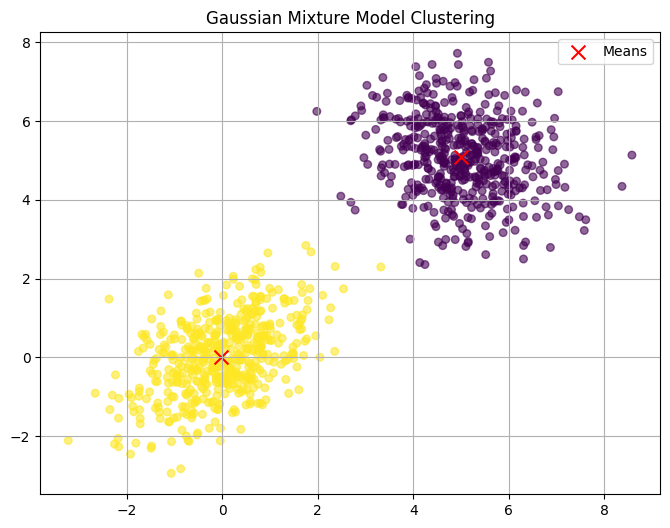

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Step 1: Generate synthetic 2D data
np.random.seed(42)
n_samples = 500
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

mean2 = [5, 5]
cov2 = [[1, -0.3], [-0.3, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

X = np.vstack((data1, data2))  # (1000, 2)

# Step 2: Initialize GMM Parameters
k = 2  # number of components
n, d = X.shape
means = X[np.random.choice(n, k, replace=False)]
covariances = [np.eye(d) for _ in range(k)]
weights = np.ones(k) / k

# Step 3-4: EM Algorithm
def e_step(X, means, covariances, weights):
    responsibilities = np.zeros((n, k))
    for i in range(k):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        responsibilities[:, i] = weights[i] * rv.pdf(X)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    covariances = []
    for i in range(k):
        diff = X - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(cov)
    return weights, means, covariances

# Run EM
max_iters = 100
tol = 1e-4
log_likelihoods = []

for iteration in range(max_iters):
    responsibilities = e_step(X, means, covariances, weights)
    weights, means, covariances = m_step(X, responsibilities)

    # Compute log-likelihood for convergence
    ll = 0
    for i in range(k):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        ll += np.sum(np.log(weights[i] * rv.pdf(X) + 1e-8))
    log_likelihoods.append(ll)
    if iteration > 0 and abs(ll - log_likelihoods[-2]) < tol:
        break

print(f"Converged in {iteration+1} iterations.")

# Visualization
colors = responsibilities.argmax(axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', alpha=0.6, s=30)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Means')
plt.title("Gaussian Mixture Model Clustering")
plt.legend()
plt.grid(True)
plt.show()


Results:

- We created a synthetic dataset with two Gaussian blobs.
- We implemented the EM algorithm manually.
- In the E-step, we compute how likely each data point is to belong to each cluster.
- In the M-step, we update the cluster parameters.
- The result is visualized by color-coded clusters.